# <a href="https://miptstats.github.io/courses/ad_mipt.html">Phystech@DataScience</a>
## Домашнее задание 13

**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@miptstats_pds_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно ноутбук в формате `ipynb`.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков можно использовать без ограничений.**

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):
* 75 баллов


<b><font color="orange">Cложная часть</font></b> (необходимо на "отл"):
* 75 баллов






-----

### *Профиль физика*
Набор данных суперсимметрии поддерживает двоичную классификацию событий столкновений в физике элементарных частиц на основе собранных особенностей столкновений. Вам будет необходимо научиться предсказывать вид события в зависимости от физических параметров частиц после столкновения.

Данные состоят из следующих функций:

*   `target class` : метки классов, где 0 - фоновое событие, 1 - суперсимметричное событие.
*   `L1pT` : импульс, поперечный лучу лептона 1
*   `L1eta` : псевдобыстрота лептона 1
*   `L1phi` : азимутальный угол лептона 1
*   `L2pT` : импульс, поперечный лучу лептона 2
*   `L2eta` : псевдобыстрота лептона 2
*   `L2phi` : азимутальный угол лептона 2
*   `missing energy magnitude` : количество недостающего поперечного импульса
*   `missing energy phi` : азимутальный угол недостающего поперечного импульса

Остальные 10 признаков получены из первых 8 непосредственно измеренных признаков. Эти последние 10 функций — это функции, которые физики элементарных частиц разработали для улучшения своей задачи по обнаружению событий. Подробнее про оригинальное исследование можете посмотреть в прикрепленной статье.


*Суперсимметрия — это теоретическая основа физики элементарных частиц, которая предлагает принцип симметрии, связывающий фермионы (частицы с полуцелым спином) и бозоны (частицы с целым спином). Эта инновационная теория вводит концепцию суперсимметричного партнера для каждой известной элементарной частицы, которая отличается по спину на 1/2, но имеет другие фундаментальные свойства, такие как заряд и масса.*


### *Профиль биология*

Набор данных включает 171 молекулу, предназначенную для функциональных доменов белка CRY1, ответственного за формирование циркадного ритма. 56 молекул токсичны, а остальные нетоксичны.

Полученные данные представляют собой полный набор из 1203 молекулярных дескрипторов.

Данное домашнее задание имеет свободную форму, то есть вашей задачей будет для каждого класса моделей получить лучший результат и после выбрать наилучшую модель. Метрика для задачи - `from sklearn.metrics import f1_score`. Работа будет оцениваться по следующим ключевым пунктам:


1.   Предвартельный анализ данных
2.   Предобработка данных
  1.   Обработка пропусков
  2.   Обработка выбросов

3.   Реализация моделей
  1.  Дерево
  2.  Лес
  3.  Логистическая регрессия
  4.  KNN
  5.  MLP



## Предварительный анализ данных

In [38]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelBinarizer, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, f1_score, mean_absolute_percentage_error

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
plt.style.use('classic')
import itertools
from IPython.display import clear_output

from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

import warnings
warnings.filterwarnings("ignore")

В этом разделе ожидается, что вы посмотрите на распределение признаков и классов, изучите их связь, проанализируете признаки на наличие в них пропусков или выбросов.

In [2]:
data = pd.read_csv("data_13_phys.csv")
df = data

In [3]:
print(df.head())

   target class      L1pT     L1eta     L1phi      L2pT     L2eta     L2phi  \
0           0.0  0.712592  0.776299 -0.977246  0.775582  0.546116  0.622289   
1           0.0  1.892328 -0.483967  0.856761  1.583623  0.419065 -1.217196   
2           0.0  0.794814 -0.449250 -0.442333  0.661218  0.421613  0.360242   
3           0.0  1.022095 -1.819581 -1.527694  1.699453 -0.942580 -0.161568   
4           0.0  1.101241 -1.554862  0.663383  0.738752  1.810270 -0.956134   

   missing energy magnitude  missing energy phi   MET_rel  axial MET  \
0                  0.282914           -0.637910  0.240377   0.594836   
1                  0.450840           -0.720053  0.525133  -0.129555   
2                  1.526186           -1.558715  0.622938  -0.883875   
3                  0.766020            1.256380  1.092142  -0.286909   
4                  0.673655           -0.281957  0.945816   0.303187   

        M_R    M_TR_2         R       MT2       S_R  M_Delta_R  dPhi_r_b  \
0  0.618827  0.3

In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 19 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   target class              300000 non-null  float64
 1   L1pT                      270281 non-null  float64
 2   L1eta                     300000 non-null  float64
 3   L1phi                     300000 non-null  float64
 4   L2pT                      300000 non-null  float64
 5   L2eta                     300000 non-null  float64
 6   L2phi                     300000 non-null  float64
 7   missing energy magnitude  300000 non-null  float64
 8   missing energy phi        300000 non-null  float64
 9   MET_rel                   300000 non-null  float64
 10  axial MET                 300000 non-null  float64
 11  M_R                       300000 non-null  float64
 12  M_TR_2                    269976 non-null  float64
 13  R                         300000 non-null  f

In [5]:
print(df.isnull().sum())

target class                    0
L1pT                        29719
L1eta                           0
L1phi                           0
L2pT                            0
L2eta                           0
L2phi                           0
missing energy magnitude        0
missing energy phi              0
MET_rel                         0
axial MET                       0
M_R                             0
M_TR_2                      30024
R                               0
MT2                             0
S_R                             0
M_Delta_R                       0
dPhi_r_b                        0
cos(theta_r1)                   0
dtype: int64


Заполним пропуски используя модель линейной регрессии

Заполним пропуски 'L1pT'

In [6]:
df_comp = df[df['L1pT'].notna()] 
df_mis = df[df['L1pT'].isna()]

X_comp = df_comp.drop(['target class', 'L1pT', 'M_TR_2'], axis=1)
X_mis = df_mis.drop(['target class', 'L1pT', 'M_TR_2'], axis=1) 

model = LinearRegression().fit(X_comp, df_comp['L1pT'])

df_mis['L1pT'] = model.predict(X_mis)

# Объединяем данные 
df = pd.concat([df_comp, df_mis])

Заполним пропуски в 'M_TR_2'

In [7]:
df_comp = df[df['M_TR_2'].notna()] 
df_mis = df[df['M_TR_2'].isna()]

X_comp = df_comp.drop(['target class', 'L1pT', 'M_TR_2'], axis=1)
X_mis = df_mis.drop(['target class', 'L1pT', 'M_TR_2'], axis=1) 

model = LinearRegression().fit(X_comp, df_comp['M_TR_2'])

df_mis['M_TR_2'] = model.predict(X_mis)

# Объединяем данные 
df = pd.concat([df_comp, df_mis])

In [8]:
print(df.isnull().sum())

target class                0
L1pT                        0
L1eta                       0
L1phi                       0
L2pT                        0
L2eta                       0
L2phi                       0
missing energy magnitude    0
missing energy phi          0
MET_rel                     0
axial MET                   0
M_R                         0
M_TR_2                      0
R                           0
MT2                         0
S_R                         0
M_Delta_R                   0
dPhi_r_b                    0
cos(theta_r1)               0
dtype: int64


Посмотрим на гистограммы с KDE

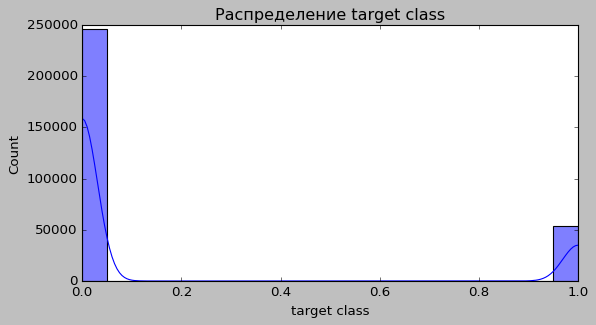

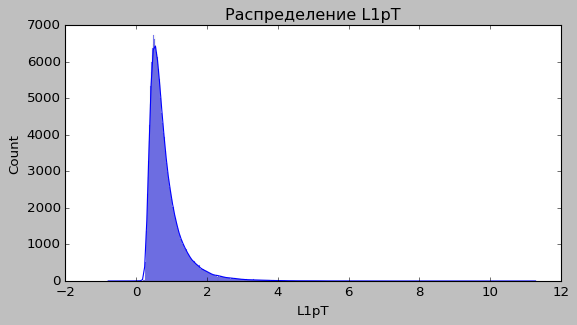

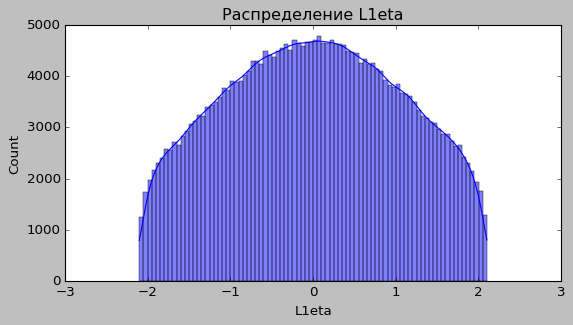

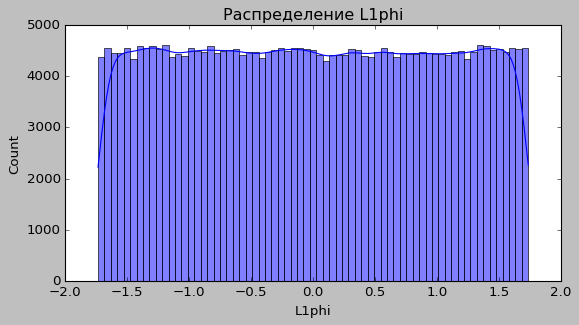

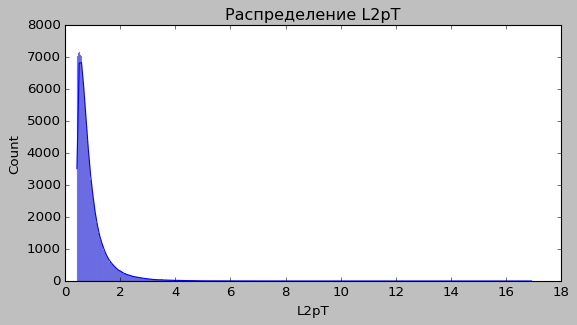

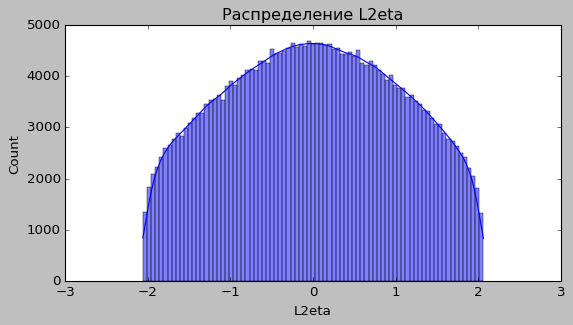

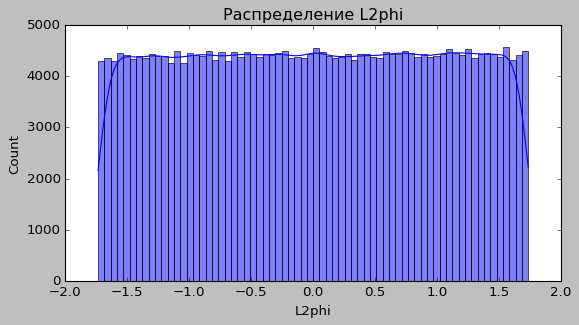

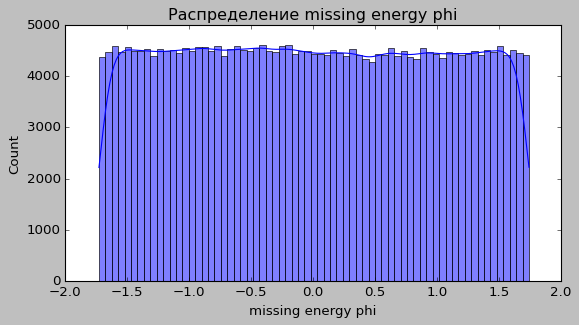

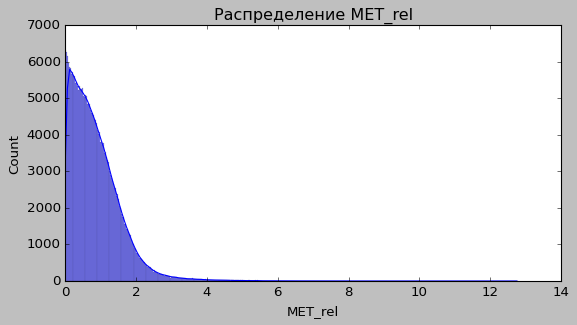

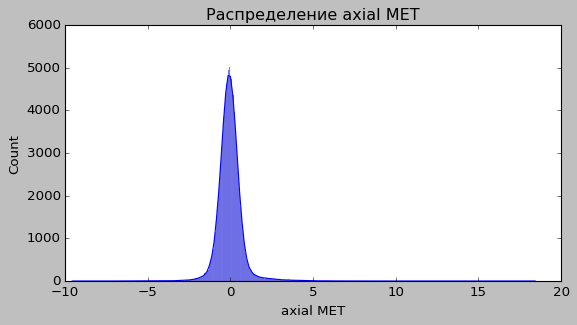

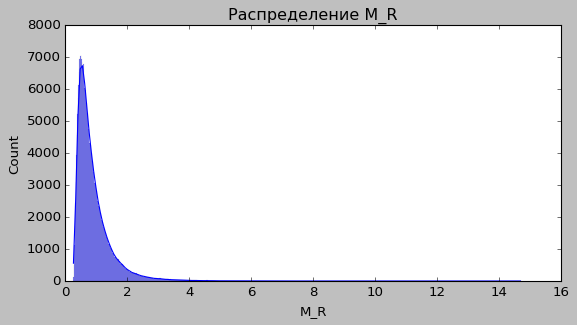

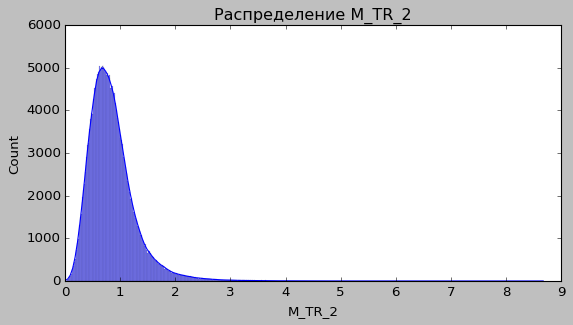

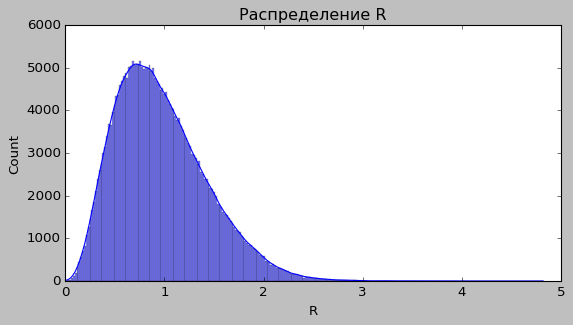

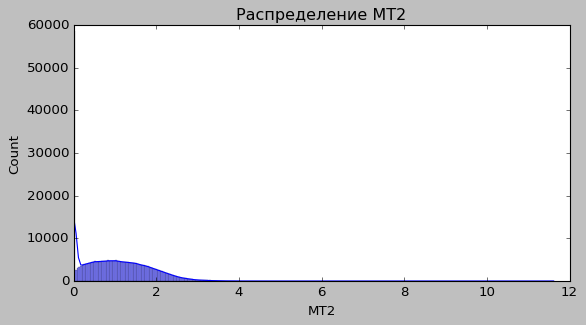

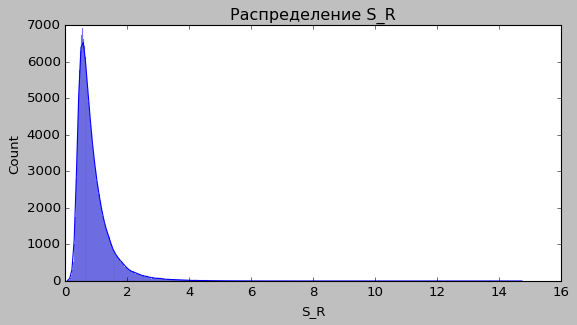

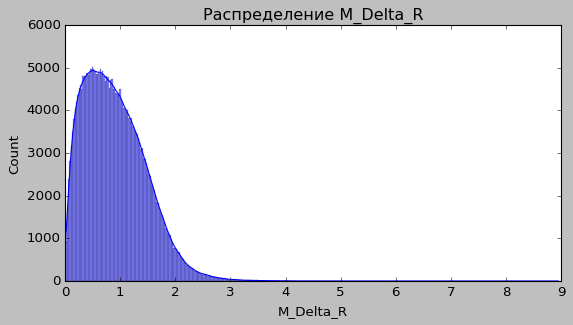

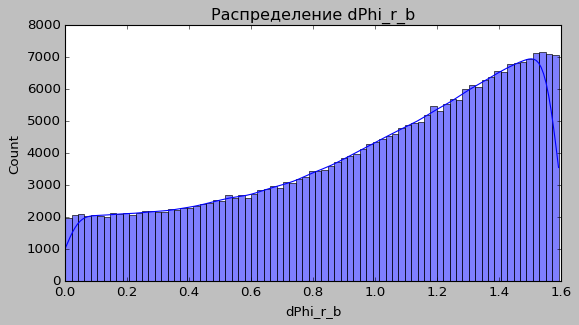

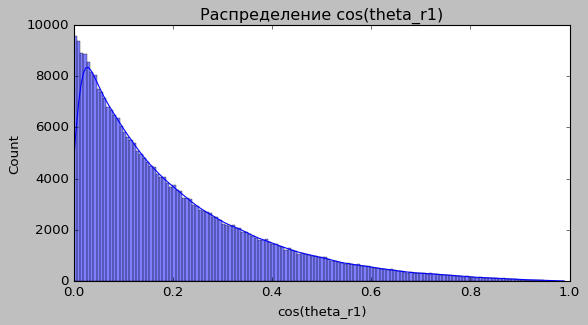

In [9]:
for col in df.columns:
    if(col == 'missing energy magnitude'): # Какая-то проблема, потерять 1 признак не критично
        continue
    plt.figure(figsize=(8, 4)) 
    sns.histplot(df[col], kde=True)
    plt.title(f'Распределение {col}')
    plt.show()

In [10]:
df = df.drop(['missing energy magnitude'], axis=1)

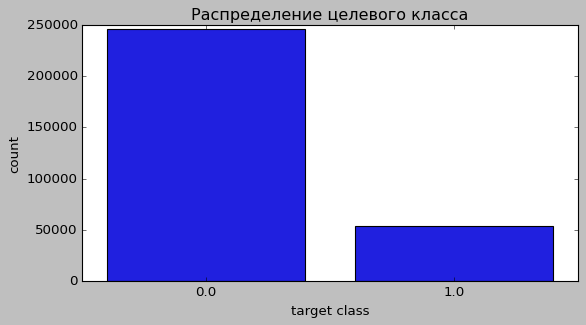

In [11]:
plt.figure(figsize=(8, 4))
sns.countplot(x='target class', data=df)
plt.title('Распределение целевого класса')
plt.show()

Данных сильно много, поэтому не буду отображать их попарные зависимости (если очень нужно, можно раскомментировать код ниже)

In [12]:
# plt.figure(figsize=(20, 10))
# sns.set_theme(font_scale=2.0)
# sns.pairplot(data, hue="target class", palette="deep")

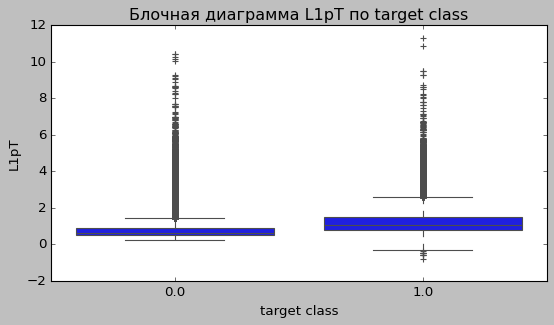

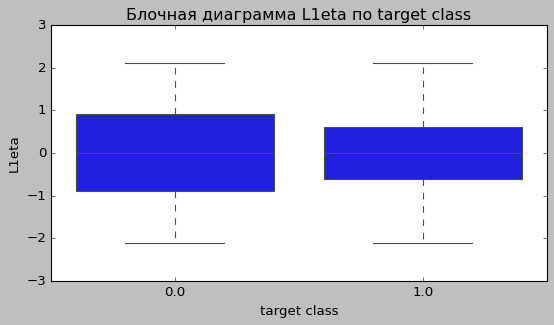

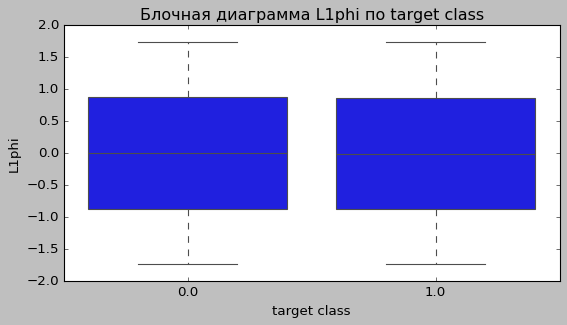

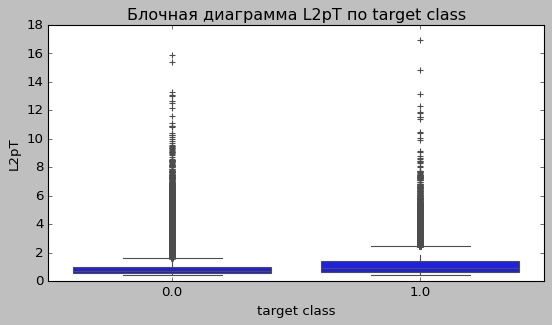

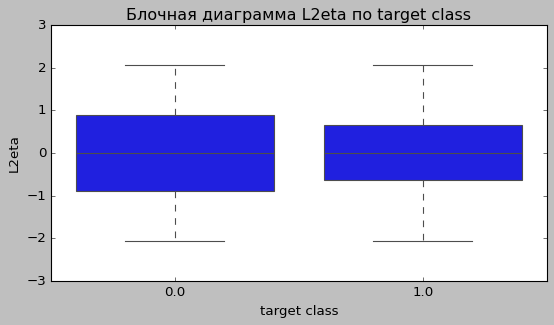

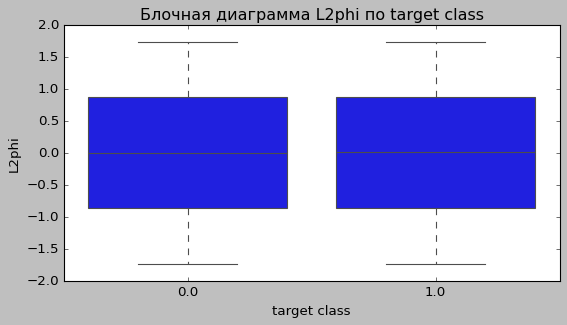

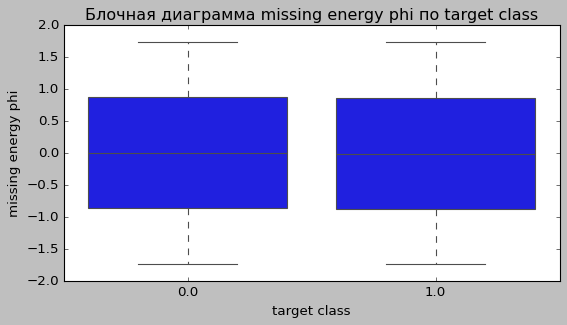

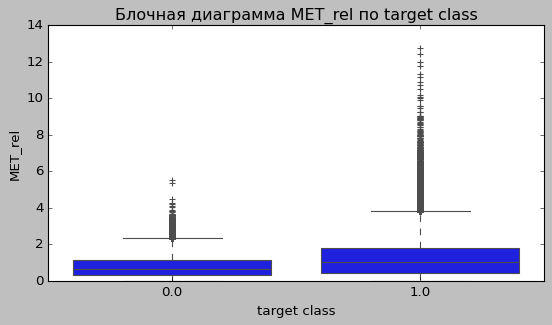

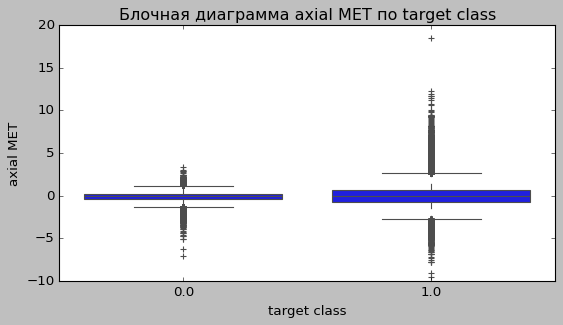

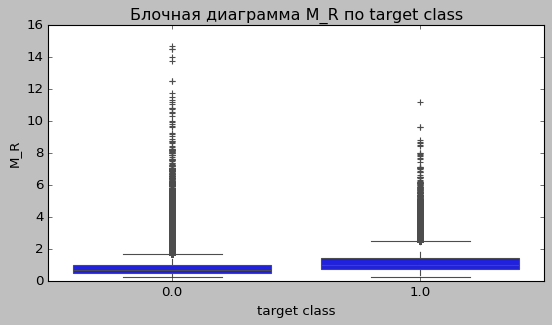

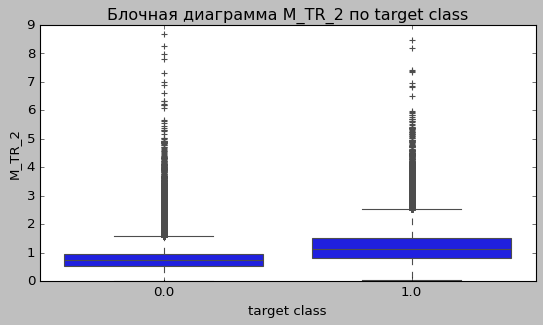

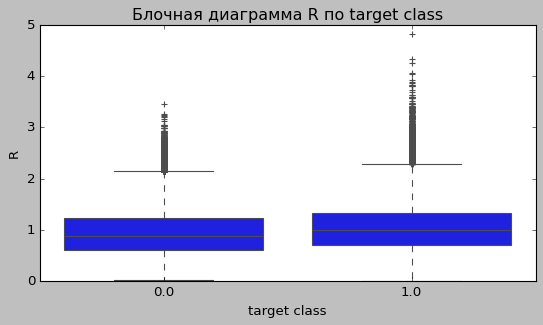

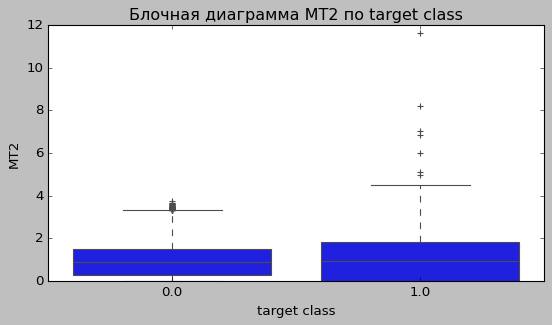

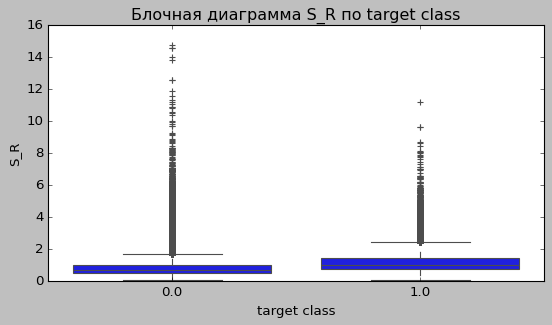

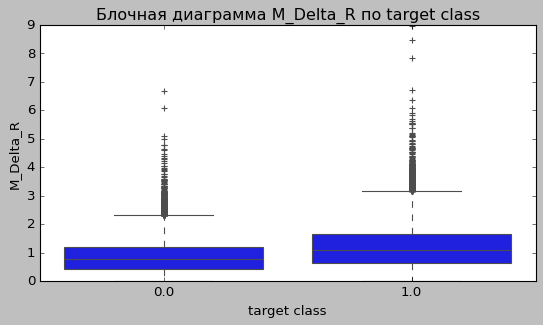

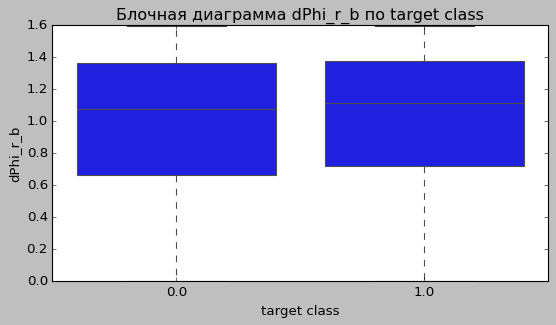

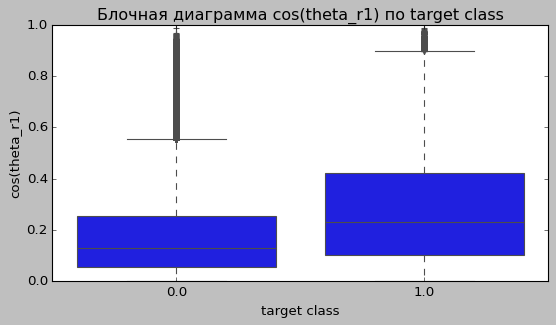

In [13]:
for col in df.columns.drop('target class'):
    if df[col].dtype in ['int64', 'float64']:
        plt.figure(figsize=(8, 4))
        sns.boxplot(x='target class', y=col, data=df)
        plt.title(f'Блочная диаграмма {col} по target class')
        plt.show()

In [14]:
print(df.describe())

        target class           L1pT          L1eta          L1phi  \
count  300000.000000  300000.000000  300000.000000  300000.000000   
mean        0.180617       0.843958       0.002342      -0.000382   
std         0.384701       0.534501       1.065371       1.003194   
min         0.000000      -0.785092      -2.102801      -1.734789   
25%         0.000000       0.517742      -0.837815      -0.868827   
50%         0.000000       0.691667       0.003970      -0.005246   
75%         0.000000       0.987484       0.842544       0.869711   
max         1.000000      11.278777       2.101538       1.734833   

                L2pT          L2eta          L2phi  missing energy phi  \
count  300000.000000  300000.000000  300000.000000       300000.000000   
mean        0.931421       0.000674       0.004912            0.001730   
std         0.594539       1.054132       1.000748            1.001141   
min         0.428588      -2.059306      -1.734191           -1.727112   
25%     

**Выводы:** У всех признаков хорошие распределения, из которых следует, что эксперименты делались аккуратно. Целевой класс распределен по '0' и '1' неравномерно. Также из блочной диаграммы видно немалое колличество выбросов. В будущем всё это нужно будет учесть

## Предобработка данных

In [15]:
df = data

В этом разделе ожидается, что вы обработаете пропуски (если они есть) с помощью линейной регрессии, а выбросы (если они есть) обработайте способом на ваше усмотрение. Для оценки качества обработки пропусков используйте метрику MAPE.

In [16]:
target1 = 'L1pT'
target2 = 'M_TR_2'

def passProcessing(target, df):
    """ target - название колонки в которой заполнить пропуски """
    
    df_comp = df[df[target].notna()] 
    df_mis = df[df[target].isna()]

    X_comp = df_comp.drop(['L1pT', 'target class', 'M_TR_2'], axis=1)
    X_mis = df_mis.drop(['L1pT', 'target class', 'M_TR_2'], axis=1) 

    pipeline = Pipeline([
        ('imputer', SimpleImputer()),
        ('model', LinearRegression())
    ])

    param_grid = [
    {
        'imputer__strategy': ['mean', 'median'], 
        'model': [LinearRegression()],
        'model__fit_intercept': [True, False]
    },
    {
        'imputer__strategy': ['mean', 'median'], 
        'model': [Ridge(), Lasso(), ElasticNet()],
        'model__fit_intercept': [True, False],
        'model__alpha': [0.01, 0.1] 
    }
    ]
    

    grid_search = GridSearchCV(pipeline, param_grid, scoring='neg_mean_absolute_percentage_error', cv=5, n_jobs=-1)

    grid_search.fit(X_comp, df_comp[target])

    print("Лучшие параметры:", grid_search.best_params_)

    df_mis[target] = grid_search.predict(X_mis)

    df = pd.concat([df_comp, df_mis])

    mape = mean_absolute_percentage_error(df_comp[target], grid_search.predict(X_comp))
    print(f'MAPE заполнения пропусков в {target}: {mape:.2f}')
    
    return df
    
df = passProcessing(target1, df)
df = passProcessing(target2, df)

Лучшие параметры: {'imputer__strategy': 'mean', 'model': ElasticNet(), 'model__alpha': 0.01, 'model__fit_intercept': False}
MAPE заполнения пропусков в L1pT: 0.17
Лучшие параметры: {'imputer__strategy': 'mean', 'model': ElasticNet(), 'model__alpha': 0.01, 'model__fit_intercept': True}
MAPE заполнения пропусков в M_TR_2: 0.13


In [17]:
print(df.isnull().sum())

target class                0
L1pT                        0
L1eta                       0
L1phi                       0
L2pT                        0
L2eta                       0
L2phi                       0
missing energy magnitude    0
missing energy phi          0
MET_rel                     0
axial MET                   0
M_R                         0
M_TR_2                      0
R                           0
MT2                         0
S_R                         0
M_Delta_R                   0
dPhi_r_b                    0
cos(theta_r1)               0
dtype: int64


обработаем выбросы медианой

In [18]:
for col in df.columns.drop('target class'):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    upper = Q3 + 1.5 * IQR
    lower = Q1 - 1.5 * IQR

    outlier_idx = df[(df[col] > upper) | (df[col] < lower)].index

    df.loc[outlier_idx, col] = df[col].median() 

In [555]:
good_features = ['L1phi', 'L1eta', 'L2eta', 'L2phi', 'missing energy phi', 'dPhi_r_b', "target class"] # фичи с наименьшим кол-вом выбросов
# plt.figure(figsize=(20, 10))
# sns.set_theme(font_scale=2.0)
# sns.pairplot(df[good_features], hue="target class", palette="deep")

## Обучение моделей

In [20]:
# Для предварительного обучения выберите первые  N <= 100000 строк, обучение лучшей модели можете произвести на всем датасете
# для теста используйте 30% выборки, размер валидационной выборки выберите на ваше усмотрение

# df1 = df.drop(['missing energy magnitude'], axis=1)


df_cat = df.sample(n=10000, random_state=207) # Считаю, что рандомные брать лучше, чем первые

X = df_cat.drop(["target class"], axis=1)
y = df_cat["target class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=207)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=207)

### DecisionTreeClassifier

In [21]:
%%time
model1 = tree.DecisionTreeClassifier()
param_grid1 = {
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}
grid_search1 = GridSearchCV(model1, param_grid1, scoring='accuracy', cv=5, n_jobs=-1)
grid_search1.fit(X_train, y_train)
print("Лучшие параметры для DecisionTreeClassifier:", grid_search1.best_params_)
best_model1 = grid_search1.best_estimator_
y_pred1 = best_model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Accuracy DecisionTreeClassifier (GridSearch): {accuracy1:.2f}')

Лучшие параметры для DecisionTreeClassifier: {'max_depth': 10, 'min_samples_split': 10}
Accuracy DecisionTreeClassifier (GridSearch): 0.87
CPU times: user 274 ms, sys: 519 ms, total: 792 ms
Wall time: 2.94 s


**Выводы:** Время работы - 2.7с, точность = 87%.

### RandomForestClassifier

In [22]:
%%time
rfc1 = RandomForestClassifier()

param_grid = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(rfc1, param_grid, scoring='accuracy', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Лучшие параметры:", grid_search.best_params_)

best_rfc = grid_search.best_estimator_
y_pred2 = best_rfc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred2)
print(f'Accuracy: {accuracy:.2f}')

Лучшие параметры: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 100}
Accuracy: 0.89
CPU times: user 2.55 s, sys: 105 ms, total: 2.66 s
Wall time: 19.7 s


**Выводы:** Время работы - 19.2с, точность = 89%. Всего на 1% больше, чем решающее дерево, но по времени работает сильно больше.

### LogisticRegression

In [23]:
%%time
model3 = LogisticRegression()
param_grid3 = {
    'penalty': ['l1', 'l2'],
    'C': [0.1, 1, 10]
}
grid_search3 = GridSearchCV(model3, param_grid3, scoring='accuracy', cv=5, n_jobs=-1)
grid_search3.fit(X_train, y_train)
print("Лучшие параметры для LogisticRegression:", grid_search3.best_params_)
best_model3 = grid_search3.best_estimator_
y_pred3 = best_model3.predict(X_test)
accuracy3 = accuracy_score(y_test, y_pred3)
print(f'Accuracy LogisticRegression (GridSearch): {accuracy3:.2f}')

Лучшие параметры для LogisticRegression: {'C': 10, 'penalty': 'l2'}
Accuracy LogisticRegression (GridSearch): 0.84
CPU times: user 152 ms, sys: 278 ms, total: 430 ms
Wall time: 201 ms


**Выводы:** Время работы - 0.2с, точность = 84%. Выигрывает по скорости у решающего дерева. Точность немного меньше.

### KNeighborsClassifier

In [24]:
%%time
model4 = KNeighborsClassifier()
param_grid4 = {
    'n_neighbors': [3, 5, 7, 10],
    'weights': ['uniform', 'distance']
}
grid_search4 = GridSearchCV(model4, param_grid4, scoring='accuracy', cv=5, n_jobs=-1)
grid_search4.fit(X_train, y_train)
print("Лучшие параметры для KNeighborsClassifier:", grid_search4.best_params_)
best_model4 = grid_search4.best_estimator_
y_pred4 = best_model4.predict(X_test)
accuracy4 = accuracy_score(y_test, y_pred4)
print(f'Accuracy KNeighborsClassifier (GridSearch): {accuracy4:.2f}')

Лучшие параметры для KNeighborsClassifier: {'n_neighbors': 5, 'weights': 'uniform'}
Accuracy KNeighborsClassifier (GridSearch): 0.84
CPU times: user 1.02 s, sys: 1.58 s, total: 2.61 s
Wall time: 710 ms


**Выводы:** Время работы - 0.7с, точность = 84%. Точность такая же как и у логистической регрессии, но работает немного дольше

Обучим решающее дерево, и найдем наилучшие параметры на всем датасете.

In [25]:
X = df.drop(["target class"], axis=1)
y = df["target class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=207)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=207)

In [26]:
%%time
model1 = tree.DecisionTreeClassifier()
param_grid1 = {
    'max_depth': [None, 10, 20, 50],
    'min_samples_split': [5, 10, 50]
}
grid_search1 = GridSearchCV(model1, param_grid1, scoring='accuracy', cv=5, n_jobs=-1)
grid_search1.fit(X_train, y_train)
print("Лучшие параметры для DecisionTreeClassifier:", grid_search1.best_params_)
best_model1 = grid_search1.best_estimator_
y_pred1 = best_model1.predict(X_test)
accuracy1 = accuracy_score(y_test, y_pred1)
print(f'Accuracy DecisionTreeClassifier (GridSearch): {accuracy1:.2f}')

Лучшие параметры для DecisionTreeClassifier: {'max_depth': 10, 'min_samples_split': 5}
Accuracy DecisionTreeClassifier (GridSearch): 0.88
CPU times: user 4.29 s, sys: 230 ms, total: 4.52 s
Wall time: 1min


### Нейронная сеть

В этом разделе предлагается самостоятельно создать и обучить нейронную сеть, про интересные структуры вы можете посмотреть на последней странице статьи.

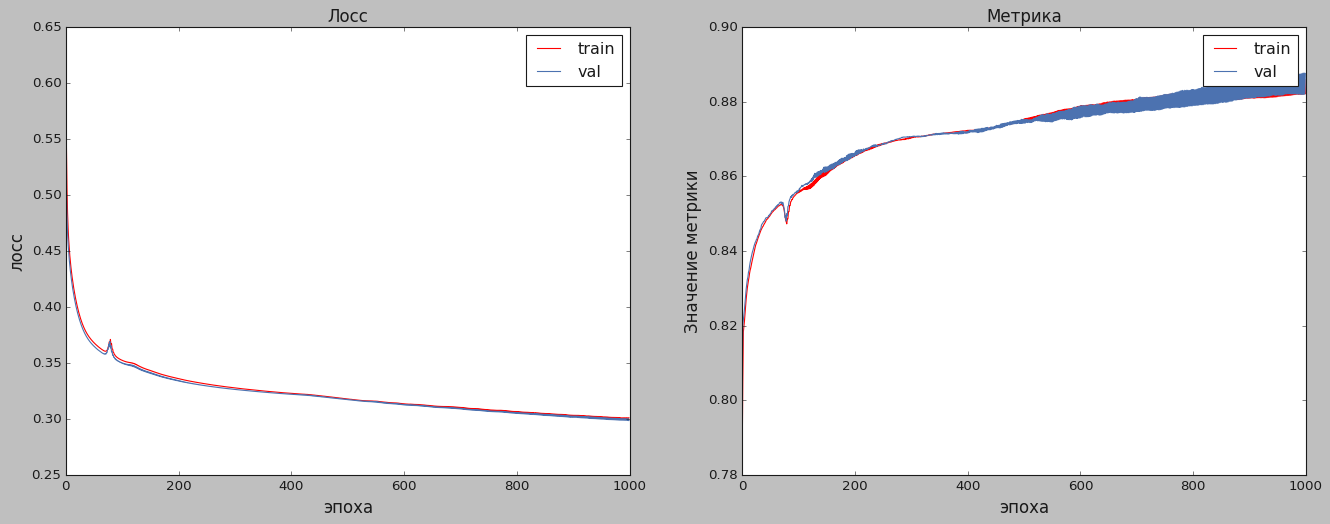

Test Loss: 0.3040, Test Accuracy: 0.88


In [545]:
def plot_learning_curves(history):
    '''
    Функция для отображения лосса и метрики во время обучения.
    '''
    clear_output(wait=True)
    fig = plt.figure(figsize=(20, 7))
    fontsize = 15   # размер шрифта
    plt.subplot(1,2,1)
    plt.title('Лосс', fontsize=fontsize)
    plt.plot(history['loss_train'], label='train', color='red')
    plt.plot(history['loss_val'],   label='val')
    plt.ylabel('лосс',  fontsize=fontsize)
    plt.xlabel('эпоха', fontsize=fontsize)
    plt.legend()
    plt.subplot(1,2,2)
    plt.title('Метрика', fontsize=fontsize)
    plt.plot(history['accuracy_train'], label='train', color='red')  # Исправлено
    plt.plot(history['accuracy_val'],   label='val')  # Исправлено
    plt.ylabel('Значение метрики', fontsize=fontsize)
    plt.xlabel('эпоха',    fontsize=fontsize)
    plt.legend()
    plt.show()


X = df.drop(["target class", 'L1phi', 'L2phi', 'missing energy phi'], axis=1)
y = df["target class"]

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=207)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=207)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

X_train = torch.FloatTensor(X_train)
y_train = torch.FloatTensor(y_train.values).reshape(-1, 1) 
X_val = torch.FloatTensor(X_val)
y_val = torch.FloatTensor(y_val.values).reshape(-1, 1)
X_test = torch.FloatTensor(X_test)
y_test = torch.FloatTensor(y_test.values).reshape(-1, 1)



l = 10
model = nn.Sequential(
    nn.Linear(in_features=len(df.columns) - 4, out_features=l),
    nn.ReLU(),
    nn.Linear(in_features=l, out_features=l),
    nn.ReLU(),
    nn.Linear(in_features=l, out_features=1),
    nn.Sigmoid()
)

for layer in model:
    if isinstance(layer, nn.Linear):
        nn.init.kaiming_uniform_(layer.weight, nonlinearity='relu')
        nn.init.zeros_(layer.bias)


optim_func = nn.BCELoss() 
optimizer = optim.SGD(model.parameters(), lr=1)

num_iter = 1000 
history = {
    'loss_train': [],
    'loss_val': [],
    'accuracy_train': [],
    'accuracy_val': [],
}

for i in range(num_iter):
    model.train()
    y_pred_train = model(X_train)
    loss_train = optim_func(y_pred_train, y_train)
    loss_train.backward()
    optimizer.step()
    optimizer.zero_grad()

    model.eval()
    with torch.no_grad():
        y_pred_val = model(X_val)
        loss_val = optim_func(y_pred_val, y_val)

    accuracy_train = accuracy_score(y_train.detach().numpy() > 0.5, y_pred_train.detach().numpy() > 0.5)
    accuracy_val = accuracy_score(y_val.detach().numpy() > 0.5, y_pred_val.detach().numpy() > 0.5)

    history['loss_train'].append(loss_train.item())
    history['loss_val'].append(loss_val.item())
    history['accuracy_train'].append(accuracy_train)
    history['accuracy_val'].append(accuracy_val)

    plot_learning_curves(history)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = optim_func(y_pred_test, y_test)
    test_accuracy = accuracy_score(y_test.detach().numpy() > 0.5, y_pred_test.detach().numpy() > 0.5)

print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy:.2f}')

Дообучение

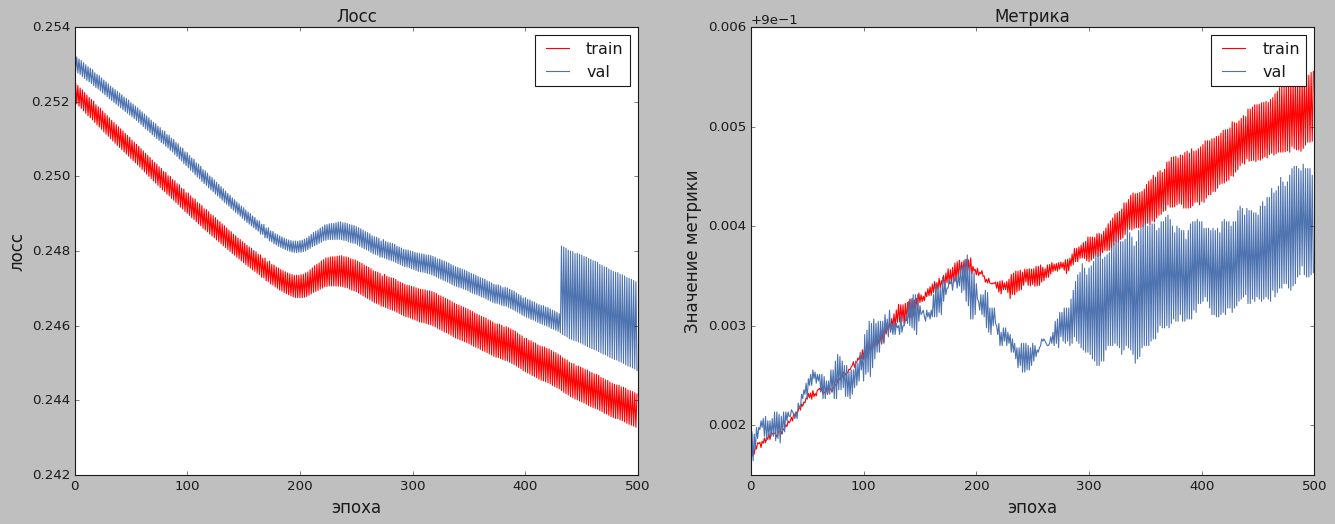

Test Loss: 0.2460, Test Accuracy: 0.903


In [553]:
optimizer = optim.SGD(model.parameters(), lr=2)

num_iter = 500 
history = {
    'loss_train': [],
    'loss_val': [],
    'accuracy_train': [],
    'accuracy_val': [],
}

for i in range(num_iter):
    model.train()
    y_pred_train = model(X_train)
    loss_train = optim_func(y_pred_train, y_train)
    loss_train.backward()
    optimizer.step()
    optimizer.zero_grad()

    model.eval()
    with torch.no_grad():
        y_pred_val = model(X_val)
        loss_val = optim_func(y_pred_val, y_val)

    accuracy_train = accuracy_score(y_train.detach().numpy() > 0.5, y_pred_train.detach().numpy() > 0.5)
    accuracy_val = accuracy_score(y_val.detach().numpy() > 0.5, y_pred_val.detach().numpy() > 0.5)

    history['loss_train'].append(loss_train.item())
    history['loss_val'].append(loss_val.item())
    history['accuracy_train'].append(accuracy_train)
    history['accuracy_val'].append(accuracy_val)

    plot_learning_curves(history)

model.eval()
with torch.no_grad():
    y_pred_test = model(X_test)
    test_loss = optim_func(y_pred_test, y_test)
    test_accuracy = accuracy_score(y_test.detach().numpy() > 0.5, y_pred_test.detach().numpy() > 0.5)

print(f'Test Loss: {test_loss.item():.4f}, Test Accuracy: {test_accuracy:.2f}')

## (Для физиков) Обучение лучшей модели на всем датасете



Выше

## Анализ полученных результатов и выводы по задаче

**Выводы:** Результаты получились лучше, чем у всех моделей, которые были до этого. Нейронная сеть труднее всего в настройке. Я считаю, что такие затраты по времени и мощностям не окупаются приростом точности на 2%